# 0) Instructions:
Please complete the workbook below. Some of the calculations are already ready to be "run". However, please read the text carefully to find questions that you should answer for credit. Remember that to answer a question in text, you click "insert", then "insert cell below", switch the input from "code" to "markdown", type your answer, and finally click the run button to set your text in stone. In a few questions, you will need to do some calculations on your own. Hint: for these calculations you can copy, paste, and modify code that is above the calculation that you need to do. You may work by yourself or in groups of 2. Please remember to put your name on top, remember to save the workbook, and remember to upload to Canvas.


Please run the code below and ignore the output. This code is simply setting the height and width of the plots we will make later on and loading a set of software "tidyverse" that we will use.

In [1]:
options(repr.plot.width = 6, repr.plot.height = 4)
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# 1) Sampling distributions for the mean from Normal population
The first thing we will do today is generate 1,000 numbers from a normal distribution with $\mu = 10$ and $s = 5$. This data represents some theoretical population. Please notice I have added the "set.seed(3)" function before using the "rnorm" command. The "set.seed" function when placed *right before* a command such as "rnorm" that generates random numbers makes these lists of random numbers reproducible. Using "set.seed(3)" means that the random numbers that are generated from the normal distribution will be the same if you run "set.seed(3)" and "rnorm" together again. This way as each student saves the 1,000 random numbers as "x", we will all have the same "x". Below please run the code to generate the random numbers from the normal distribution with $\mu = 10$ and $s = 5$.

In [3]:
set.seed(3)
x <- rnorm(n = 1000, mean = 10, sd = 5)

Below we are going to learn a tiny bit of programming in R. We have already generated 1,000 random numbers from a normal distribution and save them as "x". We can take a look at individual values from "x" by doing the following. The first "x[1]" returns the first number from "x":

In [4]:
x[1]

[1] 5.190333

Now to return the first and the second numbers from "x":

In [6]:
x[1:2]

[1] 5.190333 8.537371

And now to return the first 25 numbers from "x":

In [5]:
x[1:25]

[1]  5.190333  8.537371 11.293941  4.239341 10.978914 10.150620 10.427089
 [8] 15.583051  3.905713 16.336844  6.276092  4.343907  6.418208 11.263262
[15] 10.760229  8.461718  5.234913  6.758786 16.121568 10.999058  7.107581
[22]  5.288496  8.981359  1.667626  7.577724

Okay now let's make a histogram and then we will be ready for our main topic "Sampling Distributions". The histogram below will be for our population distribution that we have created and saved as "x":

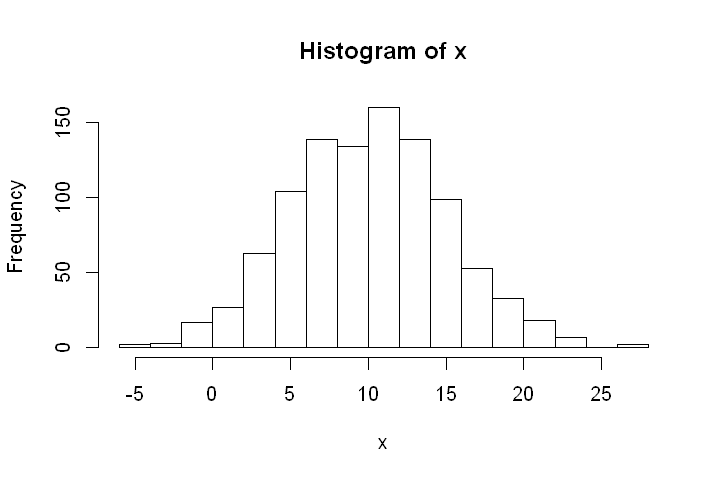

In [7]:
hist(x, breaks = 15)

Now that we have our population distribution, let's take a sample from it. Notice that we are going to use "set.seed" again. Remember that simple random sampling is a "random" process (meaning we will get a different sample each time we do it). By using "set.seed" we make sure that we get the same sample each time. If we want true random sampling we should not use "set.seed". Okay, below lets take a sample of 5 numbers from our population distribution "x" and save it as "xSample1":

In [8]:
set.seed(11)
xSample1 <- sample(x, 5)

Let's look at what is in "xSample1":

In [9]:
xSample1

[1]  4.847588 13.682511 17.065491 13.219093  9.241577

Now, let's take the mean of the values in this sample:

In [10]:
mean(xSample1)

[1] 11.61125

Okay so we have drawn a simple random sample of size 5 and calculated the sample mean for that sample. Let's do the same thing for 4 more samples: 

In [11]:
set.seed(12)
xSample2 <- sample(x, 5)

set.seed(13)
xSample3 <- sample(x, 5)

set.seed(14)
xSample4 <- sample(x, 5)

set.seed(15)
xSample5 <- sample(x, 5)

**Your turn!** Below, please create one more simple random sample called "xSample6" and please run the command "set.seed(16)" before making "xSample6".

Now lets calculate the sample mean of all the sample means by hand. Yes this is a sample mean of sample means. Make sure you have already created "xSample6" or you will get an error when you run the code below to calculate the mean of means:

In [13]:
(mean(xSample1) + mean(xSample2) + mean(xSample3) + mean(xSample4) + mean(xSample5) + mean(xSample6)) / 6

[1] 10.57032

As you might remember we can do this dirrectly using the mean command: 

In [15]:
mean(c(mean(xSample1), mean(xSample2), mean(xSample3), mean(xSample4), mean(xSample5)), mean(xSample6))

[1] 10.45954

**Question for you**. Is the mean of sample means close to the population mean?

Just as we can calculate the mean of sample means from our simple random samples, we can calculate their sample standard deviations:

In [16]:
sd(c(mean(xSample1), mean(xSample2), mean(xSample3), mean(xSample4), mean(xSample5)), mean(xSample6))

[1] 2.040665

**Question for you**. Is the standard deviation of sample means close to the population standard deviation, $\sigma$? Or is it closer to $\sigma / \sqrt{n}$? Run the code below to calculate $\sigma / \sqrt{n}$, and then answer these questions in "markdown" below that calculation.

In [17]:
5 / sqrt(5)

[1] 2.236068

So now, what if we wanted to repeat this process of drawing a simple random sample and calculating each sample mean many more times than the 6 times we have done so far? We can use the "replicate" function, which simply takes a process and replicates it a bunch of times. For example, run the code below and then we will investigate what was done:

In [18]:
set.seed(333)
sixSamples <- replicate(6, sample(x, 10))

We generated a matrix containing 6 simple random samples of size 10 from "x". Let's view these below. Each column is a simple random sample (hence there are 6 columns). 

In [19]:
sixSamples

2.211599,13.639916,13.079211,13.429310,12.073176,8.425641
10.121119,11.770786,12.456806,7.931549,12.671939,15.087306
11.302179,13.968806,9.413151,11.487456,13.429310,12.150209
14.959466,11.631734,1.839233,20.490489,10.814562,11.182707
16.564787,6.672860,12.585720,10.071286,3.682604,1.786408
9.168081,15.356845,10.583157,9.855814,10.471828,19.397974
8.537371,18.083259,16.426873,5.138496,22.320277,10.857669
7.560556,10.341814,3.869376,9.389898,6.359069,12.704994
7.905851,8.425641,9.329488,16.310382,0.116742,10.583157
14.203215,10.982922,19.333682,20.200129,11.135731,15.987737


In order to return the values that are in the first simple random sample we would use the following "sixSamples[, 1]", as below. This is asking for the first column of this matrix. This first column is the first simple random sample:

In [20]:
sixSamples[, 1]

[1]  2.211599 10.121119 11.302179 14.959466 16.564787  9.168081  8.537371
 [8]  7.560556  7.905851 14.203215

**Question for you** Please return the values from the second simple random sample using the same exact process as above (insert new cell below, and copy, paste, and modify the code from above).

Okay, so now you can generate as many simple random samples as you would like from the population distribution "x". Now let's take the mean of the first simple random sample:

In [21]:
mean(sixSamples[, 1])

[1] 10.25342

Rather than computing 5 more means in order to get the means of each of our simple random samples, we can use the "apply" function. This function applies a calculation (such as finding the sample mean) across a matrix. More specifically, below you see "apply(sixSamples, 2, mean)". This is going to take the mean of each of the columns of "sixSamples". The number 2 tells us to take the mean by column (instead of by rows). So by running this command we will compute the sample mean for each of our simple random samples from "x" in one command:

In [22]:
apply(sixSamples, 2, mean)

[1] 10.25342 12.08746 10.89167 12.43048 10.30752 11.81638

Let's go big. Below, lets generate 1000 simple random samples from "x" with each one having size 10. 

In [23]:
set.seed(22)
oneThousandSamples <- replicate(1000, sample(x, 10))

Now lets compute the sample mean for every single one of the 1,000 samples and let's save this as "meansOneThousandSamples":

In [24]:
meansOneThousandSamples <- apply(oneThousandSamples, 2, mean)

To see the first 10 sample means, we could ask for them:

In [25]:
meansOneThousandSamples[1:10]

[1] 11.262842 10.063111  8.997915 11.404898 11.771588  9.562936  8.966252
 [8]  9.208457  9.977239 10.391354

Now we are getting to the very important part! Let's make a histogram of the sample means of the 1,000 samples that were generated from our population distribution "x". We call this a sampling distribution. It is the distribution of a statistic (the mean) that we have computed from sets of samples.

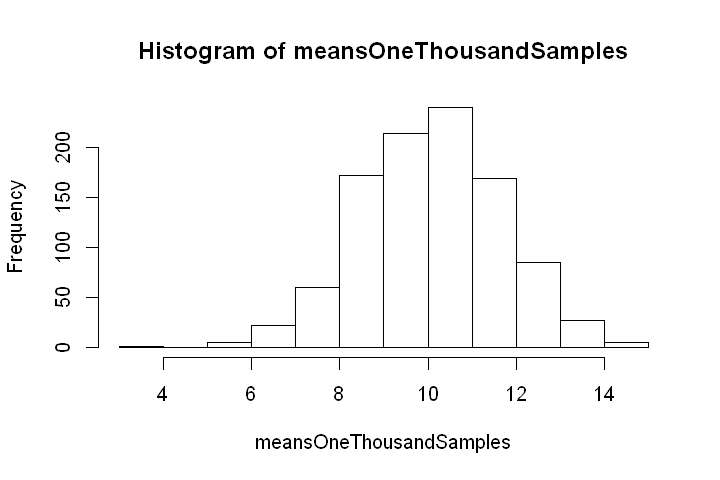

In [30]:
hist(meansOneThousandSamples)

Below, let's calculate the mean and standard deviation of the sample means from our 1,000 simple random samples.

In [27]:
mean(meansOneThousandSamples)

[1] 10.08923

In [28]:
sd(meansOneThousandSamples)

[1] 1.58748

**Question for you** Is the standard deviation of the sample means from the simple random samples drawn from "x" of size 10 closer to $\sigma$ or $\sigma / \sqrt{n}$? Please answer the question after calculating $\sigma / \sqrt{n}$ below:

In [29]:
5 / sqrt(10)

[1] 1.581139

Below, we are going to compare the histograms for the population distribution and the sampling distribution for the mean of "x". We are going to plot the histogram for the sampling distribution (of the sample means from the 1,000 simple random samples from "x") directly on top of the population distribution. We are going to make the colors slightly translucent so that you can see the population distribution although it is behind the sampling distribution. Please ignore the complicated looking code and only enjoy the picture!

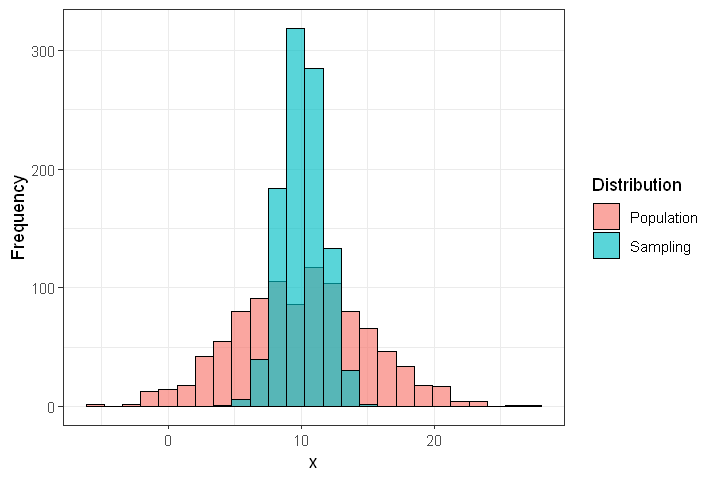

In [41]:
dfPopSamp <- rbind(data.frame(x = x, Distribution = "Population"),
                   data.frame(x = meansOneThousandSamples, Distribution = "Sampling"))
ggplot(dfPopSamp, aes(x = x, fill = Distribution)) + 
    geom_histogram(alpha = 0.65, position = "identity", color = "black", bins = 25) + theme_bw() + ylab("Frequency")

**Question for you** Looking at the histograms above, what would you say about the relationship between the population distribution and the sampling distribution of the sample mean (from samples of size 10)? Do they share the same mean? Do they have the same variance / standard deviation? Is the variability in one greater than the variablility in the other? Please answer these questions below.

# 2) Sampling distributions for other statistics from a Normal distribution

## 2.1) Sampling distribution of the sample median:

We have now seen what the sampling distribution looks like when we compute the sample mean for many simple random samples drawn from a normal distribution. Now let's study the sampling distribution for another statistic such as the median. First lets remind ourselvs that we had a matrix that had six simple random samples from our normal population distribution "x". We can see the first sample again below:

In [42]:
sixSamples[, 1]

[1]  2.211599 10.121119 11.302179 14.959466 16.564787  9.168081  8.537371
 [8]  7.560556  7.905851 14.203215

And we can compute the median for this sample:

In [43]:
median(sixSamples[, 1])

[1] 9.6446

As before we can use the "apply" function to calculate the median for each of the six samples:

In [45]:
apply(sixSamples, 2, median)

[1]  9.64460 11.70126 11.51998 10.77937 10.97515 11.66646

Now also remeber that we have a set of 1,000 simple random samples from "x". Let's calculate the median for each of these 1,000 samples and save it as "medianOneThousandSamples":

In [46]:
medianOneThousandSamples <- apply(oneThousandSamples, 2, median)

Let's take a look at the histogram of this sampling distribution (of the sample medians):

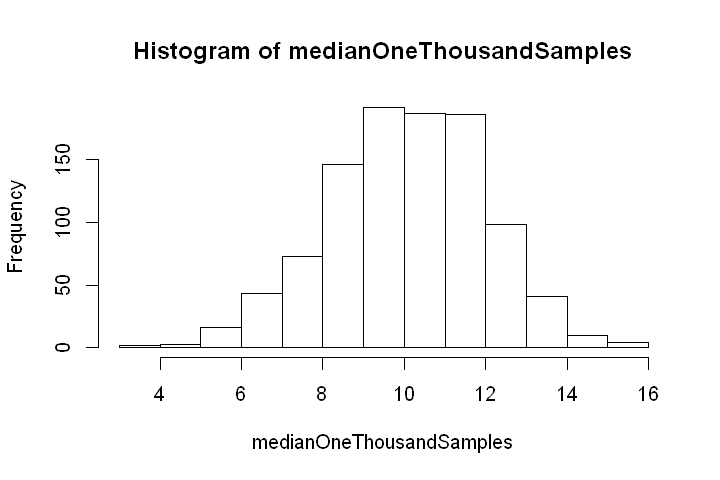

In [47]:
hist(medianOneThousandSamples)

We can estimate the mean of the sampling distribution of the median:

In [52]:
mean(medianOneThousandSamples)

[1] 10.07296

We can also estimate the standard deviation of the sampling distribution of the median, as shown below. 

In [56]:
sd(medianOneThousandSamples)

[1] 1.915598

While we don't discuss this in this course, it is known from theory that the standard deviation of the sampling distribution of the median is $\sigma_{\text{median}} = 1.253 \frac{\sigma}{\sqrt{n}}$. Let's see if our calculated standard deviation from our medians from the 1,000 samples is close to this theoretical value:

In [54]:
1.253 * 5 / sqrt(10)

[1] 1.981167

## 2.2) Sampling distribution of the sample standard deviation

Now, let's also calculate the sample standard deviation of each one of the 1,000 simple random samples from "x":

In [48]:
sdOneThousandSamples <- apply(oneThousandSamples, 2, sd)

Now let's make a histogram for the sampling distribution of the sample standard deviation given samples of size 10 from "x"

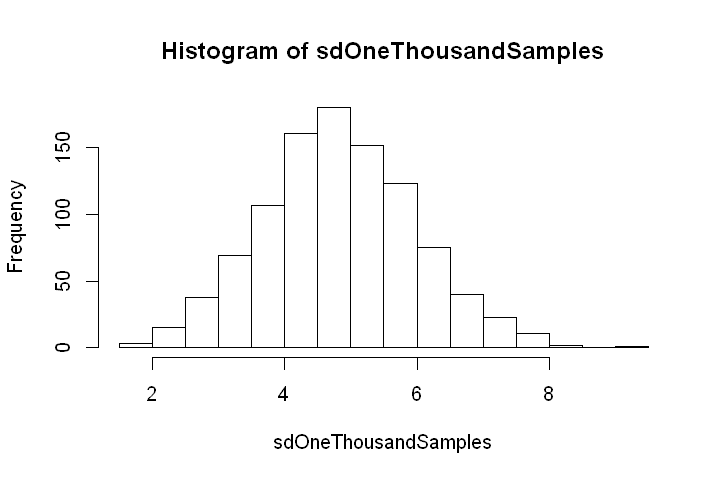

In [51]:
hist(sdOneThousandSamples)

## 2.3) Sampling distribution of the sample max:

Now, let's see what the sampling distribution of the sample maximum is from our set of one thousand samples. We will use the "apply" command as before to calculate the maximum value for each of the 1,000 samples of size 10 that we drew from our population "x":

In [57]:
maxOneThousandSamples <- apply(oneThousandSamples, 2, max)

Now let's make a histogram showing the distribution of sample maximums:

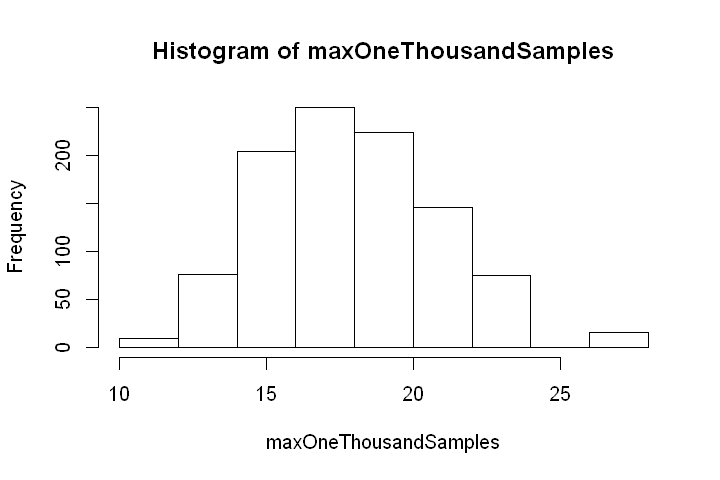

In [58]:
hist(maxOneThousandSamples)

## 2.4) Question:
Now let's take a look at the sampling distribution of the sample minimum using the 1,000 samples we have from "x". Below, insert a new cell and create "minOneThousandSamples" using the "apply" function. You should be able to copy, paste, and modify the code we utilized above for calculating the sample maximums called "maxOneThousandSamples". Then insert a new cell and make a histogram of "minOneThousandSamples".

## 2.5) Question:
We have made histograms of the sampling distributions of the mean, median, sample standard deviation, sample maximum value, and sample minimum value. They all have similar shapes. Would you say they generally have the same type of distribution? If so what kind? 

# 3) A real world example

The importance of the central limit theorem is that the sampling distribution of statistics that we are interested in (such as the mean, median, variance, or even quartiles) are approximately normal (and this approximation gets better and better as our sample size increases). We can actually apply the central limit theorem for discrete random variables. Below we will work through an example using the Binomial distribution. First let's generate 10,000 random numbers from a Binomial distribution with $n=1000$ and $\pi = .003$. We will use the "binom" function which has the following form "rbinom(Number of random numbers, $n$, $\pi$)". We will save these random numbers as "a". 

In [34]:
set.seed(2)
a <- rbinom(10000, 1000, 0.003)

Let's take a look at the first 100 numbers that are in "a":

In [35]:
a[1:100]

[1] 1 4 3 1 6 6 1 5 3 3 3 2 4 1 2 5 7 2 3 1 4 2 5 1 2 3 1 2 6 1 0 1 4 5 3 3 5
 [38] 2 4 1 7 2 1 1 6 4 7 2 3 4 0 0 4 6 2 4 4 8 3 4 4 5 3 2 5 3 2 3 2 1 2 2 0 1
 [75] 1 4 2 5 2 3 2 4 0 2 2 5 7 2 4 2 7 2 2 3 3 1 3 1 1 3

Now, please run the code below to make a histogram. 

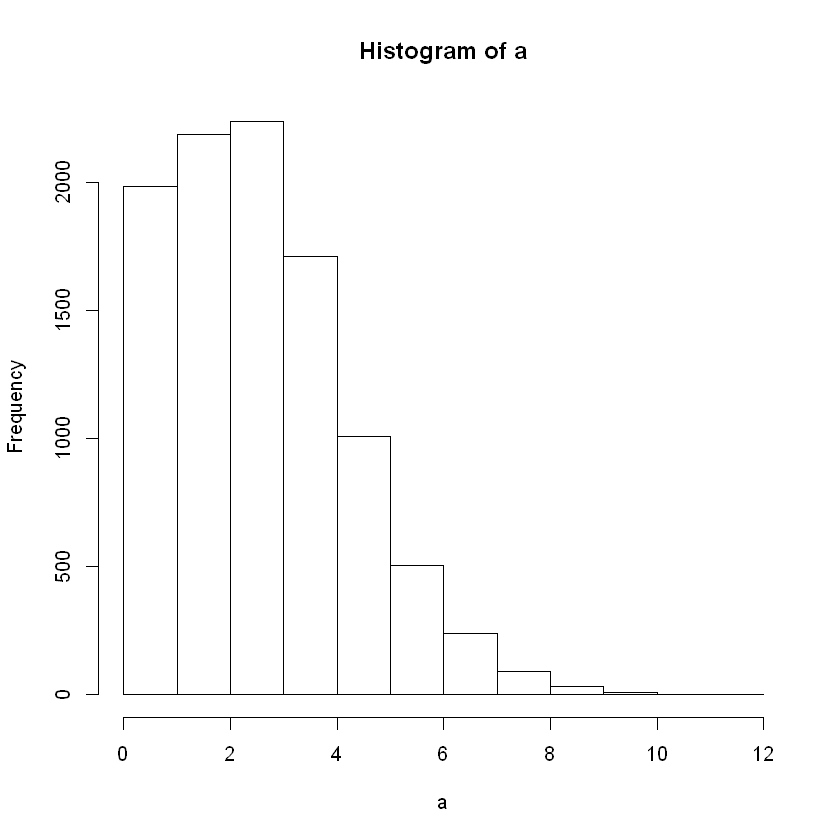

In [38]:
hist(a)

When we make a histogram of "a", as above, we can notice that our distribution does not look like a normal distribution at all--it has a long right tail. 

Now let's see what happens when we take 1000 samples from our population of size 20 and calculate the sample mean. We will use the same process as we did below, that is we will use the replicate function to take 1000 samples from our population and we will save these samples as "samplesFromBinomial". We will then calculate the sample mean from each sample and call it "meansSamplesFromBinomial". Please run the code below to do this process.

In [43]:
set.seed(22)
samplesFromBinomial <- replicate(1000, sample(a, 20))
meansSamplesFromBinomial <- apply(samplesFromBinomial, 2, mean)

Now let's take a look at what the first 10 sample means are:

In [45]:
meansSamplesFromBinomial[1:10]

[1] 2.80 3.15 2.85 3.70 3.05 2.85 3.15 3.15 3.20 3.20

And let's make a histogram of the sampling distribution of the sample means from our Binomial distribution:

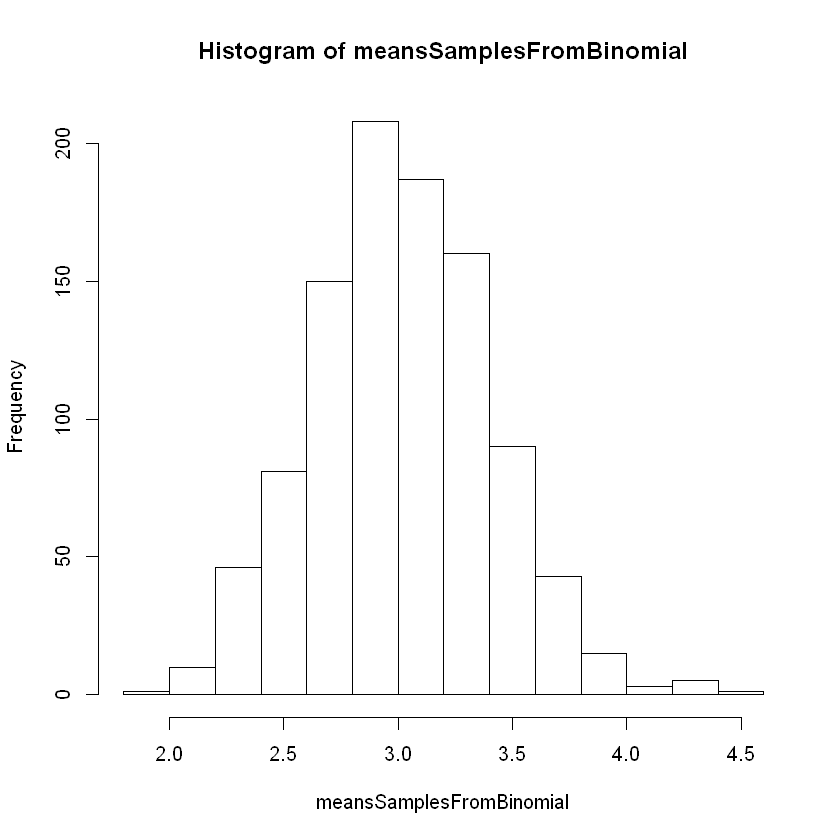

In [46]:
hist(meansSamplesFromBinomial)

**Question for you** What distribution does the above histogram appear to be? Please answer the question below in markdown (text).

**Question for you** What does the mean of the above histogram appear to be? Please take a guess and record your answer below as markdown.

Now let's compute the mean of that sampling distribution:

In [47]:
mean(meansSamplesFromBinomial)

[1] 3.0406

Interesting, the mean of the sampling distribution is about 3.0. Where does this number come from?! **Question for you**:  Below please calculate $\pi * n$. To do this please multiply the value of $\pi$ times the value of $n$ in code below:

**Extra credit bonus question Part 1!**. (This question is all or nothing--no partial credit). Above we saw that if we have a sample from a binomial distribution, if we compute the sample mean it will somehow be related to $n$ and $\pi$. Propose a formula for determining the value of $\pi$ if you did not know it (but you did know $n$). That is if you have computed $\bar{X}$ and you know $n$, what is a good guess for the $\pi$?

**Extra credit bonus question Part 2!**. Imagine you have the following sample "b" that is from a Binomial random variable with $n = 20$. You do not know $\pi$. Try to make a good guess as to the value of $\pi$. Record your answer at the end of this notebook in markdown. 

In [48]:
b <- c(4, 9, 6, 4, 8, 6, 9, 3, 6, 9, 1, 7, 4, 4, 6, 4, 7, 4, 4, 3)
b

[1] 4 9 6 4 8 6 9 3 6 9 1 7 4 4 6 4 7 4 4 3